In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as linregress
import scipy.stats as st
# import sklearn.datasets as dta
import numpy as np
import calendar

# File to Load (Remember to Change These)
bitcoin = "Resources/BTC-USD.csv"

# Data Sournce from US Energy Information Administration
# https://www.eia.gov/petroleum/gasdiesel/
gas_price = "Resources/GasPrice.csv"


# Read Purchasing File and store into Pandas data frame
bitcoin_df = pd.read_csv(bitcoin)
# print(bitcoin_df.head())
gasprice_df = pd.read_csv(gas_price)
gasprice_df.head()

,Date,Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)
0,"Apr 05, 1993",1.068
1,"Apr 12, 1993",1.079
2,"Apr 19, 1993",1.079
3,"Apr 26, 1993",1.086
4,"May 03, 1993",1.086


In [5]:
gasprice_df.columns
gasprice_df.dtypes


Date                                                                                     object
Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)    float64
dtype: object

In [6]:
bitcoin_df.columns
print(bitcoin_df.dtypes)

bitcoin_df["Date"] = pd.to_datetime(bitcoin_df["Date"]).dt.strftime('%m/%d/%Y')
print(bitcoin_df)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object
            Date          Open          High           Low         Close  \
0     10/30/2016    714.117981    714.117981    696.474976    701.864014   
1     10/31/2016    702.640015    709.289001    691.682007    700.971985   
2     11/01/2016    701.336975    736.452026    701.336975    729.793030   
3     11/02/2016    730.065979    740.828979    722.348999    740.828979   
4     11/03/2016    742.346008    745.773010    678.156006    688.700012   
...          ...           ...           ...           ...           ...   
1822  10/26/2021  63032.761720  63229.027340  59991.160160  60363.792970   
1823  10/27/2021  60352.000000  61435.183590  58208.187500  58482.386720   
1824  10/28/2021  58470.730470  62128.632810  58206.917970  60622.136720   
1825  10/29/2021  60624.871090  62927.609380  60329.964840  62227.964840   
182

In [7]:
# bitcoin_df.head()


gas_df = gasprice_df.rename(columns = {"Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)":"Retail Price"})

gas_df["Date"] = pd.to_datetime(gas_df["Date"]).dt.strftime('%m/%d/%Y')
print(gas_df)


            Date  Retail Price
0     04/05/1993         1.068
1     04/12/1993         1.079
2     04/19/1993         1.079
3     04/26/1993         1.086
4     05/03/1993         1.086
...          ...           ...
1486  09/27/2021         3.271
1487  10/04/2021         3.285
1488  10/11/2021         3.360
1489  10/18/2021         3.416
1490  10/25/2021         3.476

[1491 rows x 2 columns]


In [8]:
# dates = bitcoin_df["Date"]
# close_price = bitcoin_df["Close"]

# plt.figure(figsize = (50,30))

# plt.plot(dates, close_price, color="green", label="Bitcoin Price")
# plt.legend(loc="best")
# plt.title("Bitcoin Price")
# plt.xlabel("Date")
# plt.ylabel("Price")


# dates = gas_df["Date"]
# price = gas_df["Retail Price"]

# plt.plot(dates, price, color="red", label="Gas Price")
# plt.legend(loc="best")
# plt.xlabel("Date")
# plt.ylabel("Price")
# plt.show()



In [9]:
bitcoin_gasprice_df = pd.merge(bitcoin_df,gas_df, on ="Date", how = "inner")
bitcoin_gasprice_df = bitcoin_gasprice_df[["Date","Close", "Retail Price"]]
bitcoin_gasprice_df = bitcoin_gasprice_df.rename(columns={'Close': 'Bitcoin_price', 'Retail Price': 'Gas_Price'})
bitcoin_gasprice_df =bitcoin_gasprice_df.dropna()

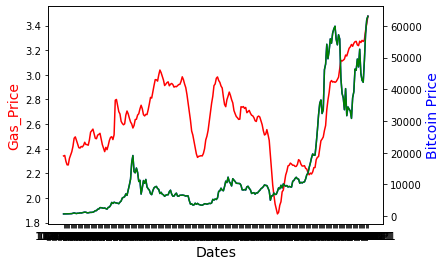

In [10]:
dates = bitcoin_gasprice_df["Date"]
bitcoin_price = bitcoin_gasprice_df["Bitcoin_price"]
gas_price = bitcoin_gasprice_df["Gas_Price"]


fig,ax = plt.subplots()

ax.plot(dates, gas_price, color = "red")
ax.set_xlabel("Dates",fontsize = 14)
ax.set_ylabel("Gas_Price",color="red",fontsize = 14)


ax2=ax.twinx()

ax2.plot(dates, bitcoin_price, color="blue")
ax2.set_ylabel("Bitcoin Price", color="blue", fontsize=14)
plt.plot(dates, bitcoin_price, color="green", label="Bitcoin Price")


plt.show()


The correlation coefficient between Bitcoin price and Gas Price is 0.51


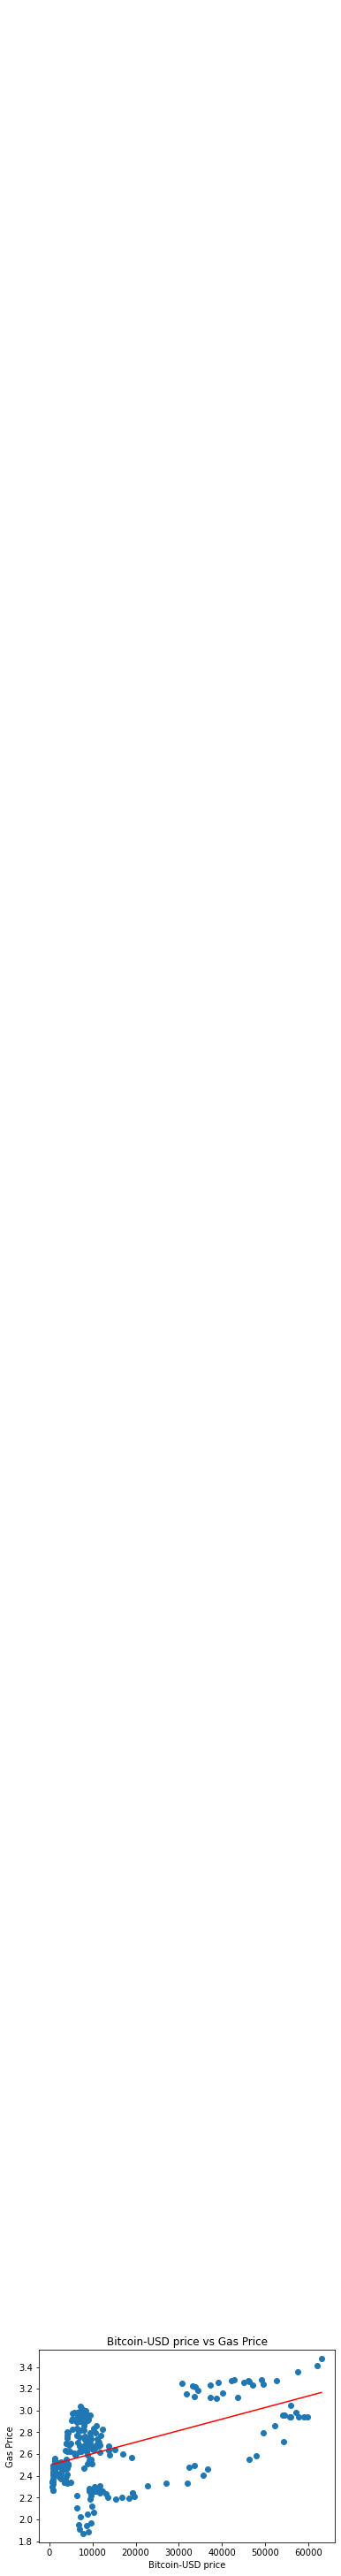

In [11]:
x_values = bitcoin_gasprice_df["Bitcoin_price"]
y_values = bitcoin_gasprice_df["Gas_Price"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,25),fontsize=15,color="red")
plt.title("Bitcoin-USD price vs Gas Price")
plt.xlabel('Bitcoin-USD price')
plt.ylabel('Gas Price')

print(f"The correlation coefficient between Bitcoin price and Gas Price is {round(st.pearsonr(x_values,y_values)[0],2)}")
plt.show()